Student Id	     : 2358431

Student Name	   : Anupam Poudel

Section			     : L5CG10

Module Leader	   : Mr. Siman Giri

Tutor 		       : Ms. Prakriti Regmi

Submitted on.    : 2024/12/20

In [238]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/assignment1


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/assignment1


3 Tasks - To - Do:

Please Solve all the Problems as instructed:

3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:
1. Data Exploration and Understanding:

  • Dataset Overview:
    1. Load the dataset and display the first 10 rows.
    

In [239]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('WHR-2024-5CS037.csv')
print("First 10 Rows of dataset:")
df.head(10)

First 10 Rows of dataset:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.
    

In [240]:
num_rows, num_columns = df.shape
print("Number of rows: ", num_rows)
print("Number of columns: ",num_columns)

Number of rows:  143
Number of columns:  9


3. List all the columns and their data types.

In [241]:
print("\nColumns and their data types:")
df.dtypes


Columns and their data types:


,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.


In [242]:
print("Basic Statistics for 'Score' column:")
print("Mean: ", df['score'].mean())
print("Median: ", df['score'].median())
print("Standard Deviation: ", df['score'].std())

Basic Statistics for 'Score' column:
Mean:  5.52758041958042
Median:  5.785
Standard Deviation:  1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [243]:
highest_score_country = df.loc[df['score'].idxmax()]['Country name']
lowest_score_country = df.loc[df['score'].idxmin()]['Country name']

print("Country with the highest happiness score:", highest_score_country)
print("Country with the lowest happiness score:", lowest_score_country)

Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [244]:
missing_values = df.isnull().sum()

print("Missing values count for each column:")
missing_values

Missing values count for each column:


,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.


In [245]:
filtered_df = df[df['score'] > 7.5]
filtered_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [246]:
sorted_filtered_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print("Top 10 countries with Score greater than 7.5 sorted by GDP per Capita:")
sorted_filtered_df.head(10)

Top 10 countries with Score greater than 7.5 sorted by GDP per Capita:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

        Low − (Score < 4)

        Medium − (4 ≤ Score ≤ 6)

        High − (Score > 6)

In [247]:
conditions = [
    (df['score'] < 4),
    (df['score'] >= 4) & (df['score'] <= 6),
    (df['score'] > 6)
]

categories = ['Low', 'Medium', 'High']

df['Happiness Category'] = np.select(conditions, categories)

print("Dataset with new 'Happiness Category' column:")
df.head()

Dataset with new 'Happiness Category' column:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


2. Data Visualizations:

  • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

  

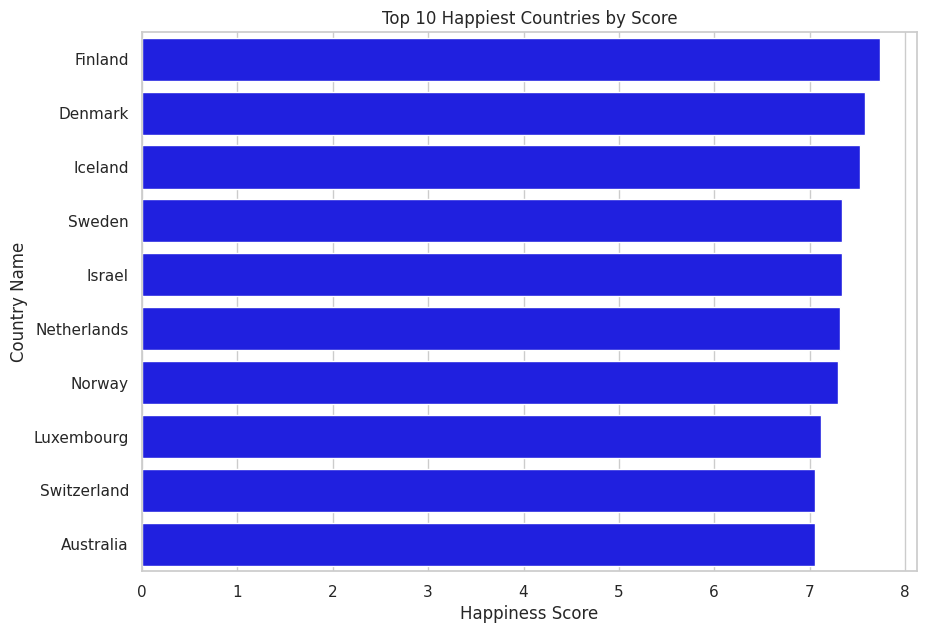

In [248]:
top_10_happy = df.nlargest(10, 'score')
plt.figure(figsize=(10, 7))
sns.barplot(x='score', y='Country name', data=top_10_happy ,color='blue')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.show()

  • Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
.

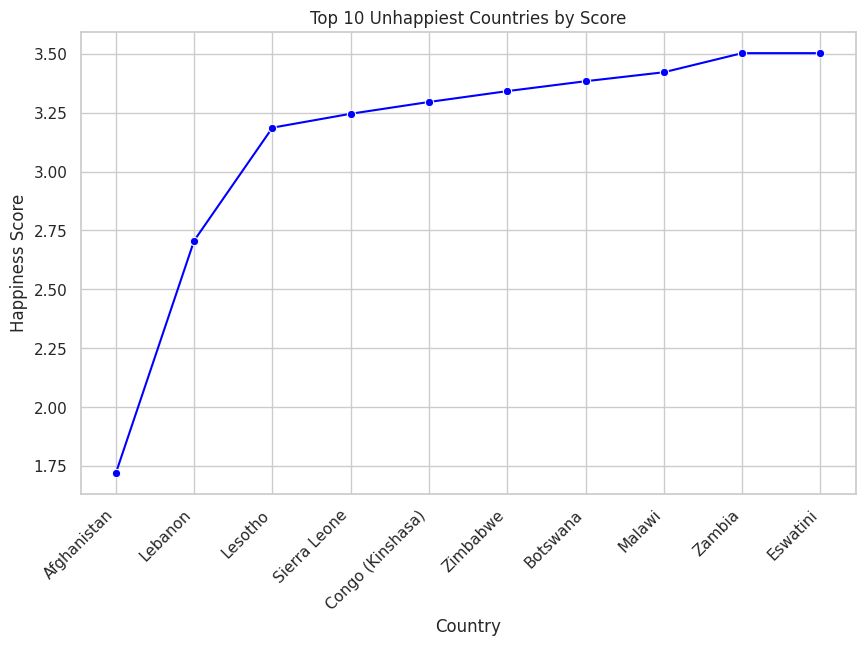

In [249]:
top_10_unhappy = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappy, marker='o', color='blue')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha="right")
plt.show()


  • Plot a histogram for the Score column to show its distribution and also interpret.


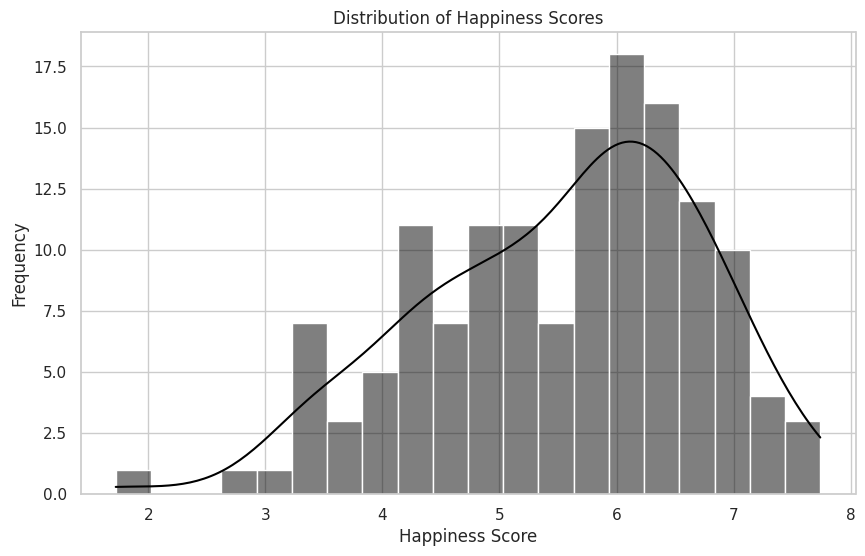

In [250]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True, color='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


  • Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship

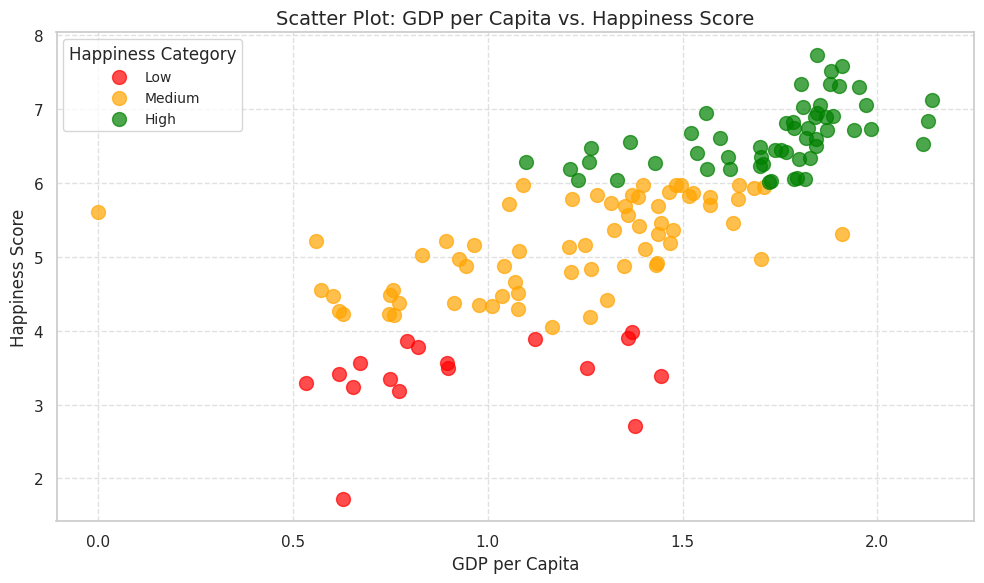

In [251]:
plt.figure(figsize=(10, 6))
categories = {'Low': 'red', 'Medium': 'orange', 'High': 'green'}

for category, color in categories.items():
    subset = df[df['Happiness Category'] == category]
    plt.scatter(
        subset['Log GDP per capita'], subset['score'],
        label=category, color=color, s=100, alpha=0.7
    )

plt.title('Scatter Plot: GDP per Capita vs. Happiness Score', fontsize=14)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend(title='Happiness Category', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

3.2 Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India" "Maldives", "Nepal", "Pakistan", "Srilanka"]


In [252]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]


2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}


In [253]:
filtered_data = df[df['Country name'].isin(south_asian_countries)]
filtered_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


3. Save the filtered dataframe as separate CSV files for future use.

In [254]:
filtered_data.to_csv('south_asia_filtered_data.csv', index=False)

Task - 2 - Composite Score Ranking:

Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

    Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy


In [255]:
dsa = pd.read_csv('south_asia_filtered_data.csv')
dsa['Composite Score'] = (0.40 * dsa['Log GDP per capita']) + (0.30 * dsa['Social support']) + (0.30 * dsa['Healthy life expectancy'])

2. Rank the South Asian countries based on the Composite Score in descending order.


In [256]:
print("Ranking South Asian countries based on the Composite Score in descending order.")
dsa = dsa.sort_values(by='Composite Score', ascending=False)
dsa

Ranking South Asian countries based on the Composite Score in descending order.


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.


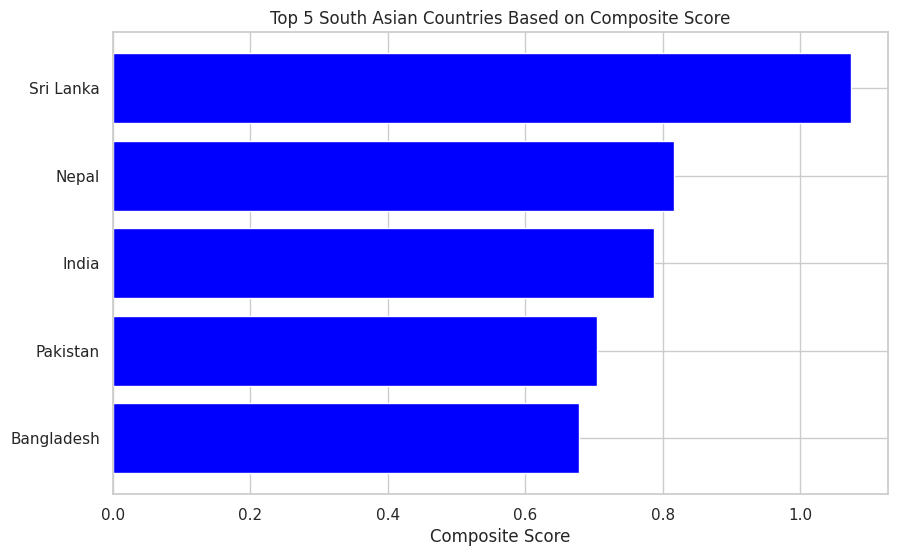

In [257]:
top_5_countries = dsa.head(5)
plt.figure(figsize=(10, 6))
# Correct the column name to 'Country name'
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='blue')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries Based on Composite Score')
plt.gca().invert_yaxis()
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

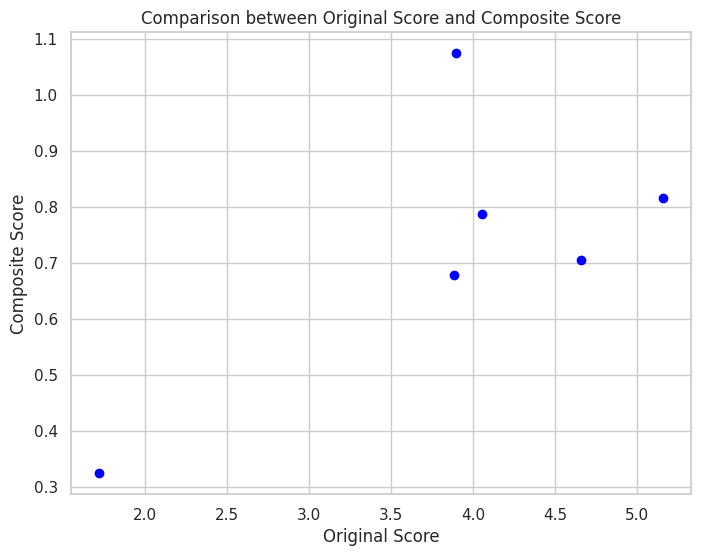

In [258]:
plt.figure(figsize=(8, 6))
plt.scatter(dsa['score'], dsa['Composite Score'], color='blue')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.title('Comparison between Original Score and Composite Score')
plt.show()

In [259]:
print("Rankings based on Composite Score:")
dsa[['Country name', 'Composite Score', 'score']]

Rankings based on Composite Score:


,Country name,Composite Score,score
3,Sri Lanka,1.0739,3.898
0,Nepal,0.8159,5.158
2,India,0.7874,4.054
1,Pakistan,0.7039,4.657
4,Bangladesh,0.6774,3.886
5,Afghanistan,0.3238,1.721


Task - 3 - Outlier Detection:

Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.


In [260]:
print("South Asia Dataset:")
print(dsa[['Country name', 'score', 'Log GDP per capita']])

print("\nDescriptive Statistics for 'Score' and 'Log GDP per capita':")
print(dsa[['score', 'Log GDP per capita']].describe())


South Asia Dataset:
  Country name  score  Log GDP per capita
3    Sri Lanka  3.898               1.361
0        Nepal  5.158               0.965
2        India  4.054               1.166
1     Pakistan  4.657               1.069
4   Bangladesh  3.886               1.122
5  Afghanistan  1.721               0.628

Descriptive Statistics for 'Score' and 'Log GDP per capita':
          score  Log GDP per capita
count  6.000000            6.000000
mean   3.895667            1.051833
std    1.177069            0.245361
min    1.721000            0.628000
25%    3.889000            0.991000
50%    3.976000            1.095500
75%    4.506250            1.155000
max    5.158000            1.361000


In [261]:
def detect_outliers_IQR(column):
    Q1 = dsa[column].quantile(0.25)
    Q3 = dsa[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"\nFor '{column}':")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    return (dsa[column] < lower_bound) | (dsa[column] > upper_bound)

dsa['Outlier_Score'] = detect_outliers_IQR('score')
dsa['Outlier_GDP'] = detect_outliers_IQR('Log GDP per capita')

dsa['Outlier'] = dsa['Outlier_Score'] | dsa['Outlier_GDP']

outliers = dsa[dsa['Outlier'] == True]
print("\nOutlier Countries Based on Score and GDP per Capita:")
print(outliers[['Country name', 'score', 'Log GDP per capita']])



For 'score':
Q1: 3.8890000000000002, Q3: 4.50625, IQR: 0.6172499999999994, Lower Bound: 2.963125000000001, Upper Bound: 5.432124999999999

For 'Log GDP per capita':
Q1: 0.991, Q3: 1.155, IQR: 0.16400000000000003, Lower Bound: 0.7449999999999999, Upper Bound: 1.401

Outlier Countries Based on Score and GDP per Capita:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.


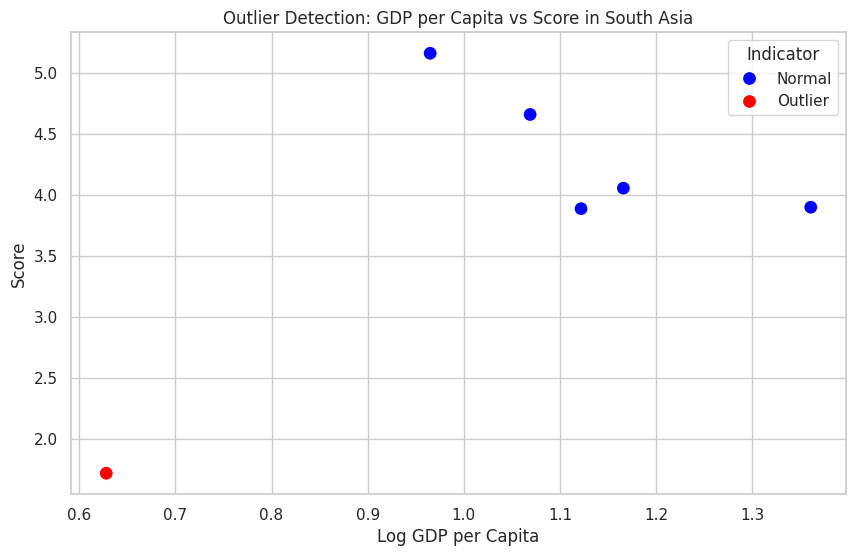

In [262]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=dsa, x='Log GDP per capita', y='score',
                               hue='Outlier', palette={True: 'red', False: 'blue'}, s=100)

handles, labels = scatter_plot.get_legend_handles_labels()
scatter_plot.legend(handles=[handles[0], handles[1]], labels=['Normal', 'Outlier'], title='Indicator')

plt.title('Outlier Detection: GDP per Capita vs Score in South Asia')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.show()


4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Discussion:
1. Outliers are identified using the 1.5 × IQR rule for both Score and Log GDP per Capita.
2. The highlighted outlier countries may significantly deviate from the regional averages:
   - Countries with high GDP but relatively low scores indicate inequality or other social challenges.
   - Countries with low GDP but unusually high scores may highlight unique strengths such as social support or healthy life expectancy.
3. These outliers can skew the regional averages, impacting metrics used for policy-making and analysis.


In [263]:
outliers

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,Outlier_Score,Outlier_GDP,Outlier
5,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238,True,True,True


Task - 4 - Exploring Trends Across Metrics:

Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.


In [264]:
metric_1 = 'Freedom to make life choices'
metric_2 = 'Generosity'

correlation_1 = dsa['score'].corr(dsa[metric_1])
correlation_2 = dsa['score'].corr(dsa[metric_2])

print(f"Pearson Correlation between 'Score' and '{metric_1}': {correlation_1:.2f}")
print(f"Pearson Correlation between 'Score' and '{metric_2}': {correlation_2:.2f}")

Pearson Correlation between 'Score' and 'Freedom to make life choices': 0.80
Pearson Correlation between 'Score' and 'Generosity': 0.87


2. Create scatter plots with trendlines for these metrics against the Score.


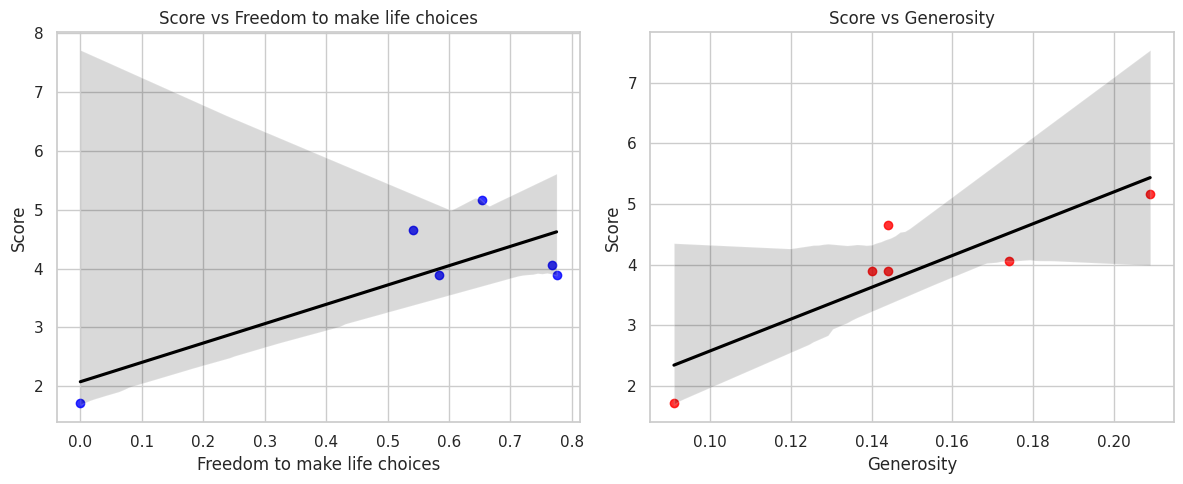

In [265]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(data=dsa, x=metric_1, y='score',
            scatter_kws={'color':'blue'}, line_kws={'color':'black'})
plt.title(f'Score vs {metric_1}')
plt.xlabel(metric_1)
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.regplot(data=dsa, x=metric_2, y='score',
            scatter_kws={'color':'red'}, line_kws={'color':'black'})
plt.title(f'Score vs {metric_2}')
plt.xlabel(metric_2)
plt.ylabel('Score')

plt.tight_layout()
plt.show()


3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [266]:
if abs(correlation_1) > abs(correlation_2):
    strongest = metric_1
    weakest = metric_2
else:
    strongest = metric_2
    weakest = metric_1

print(f"The strongest relationship is between 'Score' and '{strongest}' with a correlation of {max(abs(correlation_1), abs(correlation_2)):.2f}.")
print(f"The weakest relationship is between 'Score' and '{weakest}' with a correlation of {min(abs(correlation_1), abs(correlation_2)):.2f}.")

print(f"""
Discussion:
1. '{strongest}' shows the strongest relationship with the Score, suggesting that it has a significant impact on the well-being or happiness of South Asian countries.
2. '{weakest}' shows the weakest relationship with the Score, indicating that it has a minimal influence compared to other metrics.
3. The scatter plots with trendlines visually confirm these findings, where the strongest relationship shows a clear linear trend, while the weakest relationship appears more scattered.
""")


The strongest relationship is between 'Score' and 'Generosity' with a correlation of 0.87.
The weakest relationship is between 'Score' and 'Freedom to make life choices' with a correlation of 0.80.

Discussion:
1. 'Generosity' shows the strongest relationship with the Score, suggesting that it has a significant impact on the well-being or happiness of South Asian countries.
2. 'Freedom to make life choices' shows the weakest relationship with the Score, indicating that it has a minimal influence compared to other metrics.
3. The scatter plots with trendlines visually confirm these findings, where the strongest relationship shows a clear linear trend, while the weakest relationship appears more scattered.



Task - 5 - Gap Analysis:

Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.


In [267]:
dsa['GDP-Score Gap'] = dsa['Log GDP per capita'] - dsa['score']

print("South Asia Dataset with GDP-Score Gap:")
print(dsa[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

South Asia Dataset with GDP-Score Gap:
  Country name  Log GDP per capita  score  GDP-Score Gap
3    Sri Lanka               1.361  3.898         -2.537
0        Nepal               0.965  5.158         -4.193
2        India               1.166  4.054         -2.888
1     Pakistan               1.069  4.657         -3.588
4   Bangladesh               1.122  3.886         -2.764
5  Afghanistan               0.628  1.721         -1.093


2. Rank the South Asian countries by this gap in both ascending and descending order.


In [268]:
ascending_gap = dsa.sort_values(by='GDP-Score Gap', ascending=True)
print("\nCountries Ranked by GDP-Score Gap (Ascending):")
print(ascending_gap[['Country name', 'GDP-Score Gap']])

descending_gap = dsa.sort_values(by='GDP-Score Gap', ascending=False)
print("\nCountries Ranked by GDP-Score Gap (Descending):")
print(descending_gap[['Country name', 'GDP-Score Gap']])


Countries Ranked by GDP-Score Gap (Ascending):
  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888
4   Bangladesh         -2.764
3    Sri Lanka         -2.537
5  Afghanistan         -1.093

Countries Ranked by GDP-Score Gap (Descending):
  Country name  GDP-Score Gap
5  Afghanistan         -1.093
3    Sri Lanka         -2.537
4   Bangladesh         -2.764
2        India         -2.888
1     Pakistan         -3.588
0        Nepal         -4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.


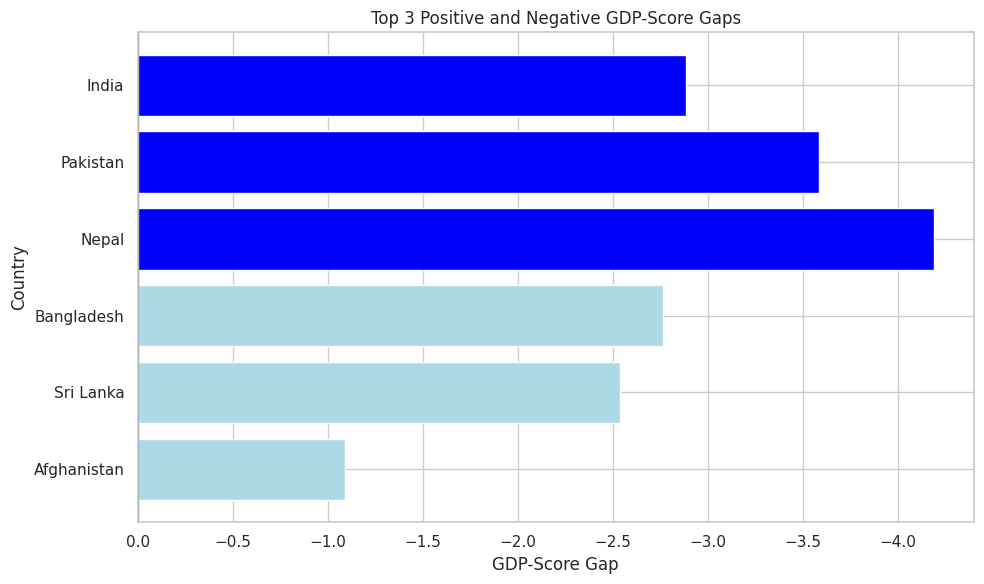

In [281]:
top_positive_gaps = descending_gap.head(3)
top_negative_gaps = ascending_gap.head(3)

top_gaps = pd.concat([top_positive_gaps, top_negative_gaps])

plt.figure(figsize=(10, 6))

plt.barh(top_gaps['Country name'], top_gaps['GDP-Score Gap'], color=['lightblue', 'lightblue', 'lightblue', 'Blue', 'blue', 'blue'])
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Top 3 Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')

plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()


4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [270]:
print("Top 3 Countries with Largest Positive GDP-Score Gaps:")
print(top_positive_gaps[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

print("\nTop 3 Countries with Largest Negative GDP-Score Gaps:")
print(top_negative_gaps[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

print("""
Discussion:
Positive GDP-Score Gaps:
- These are countries that earn more income from their citizens on average than how happy they are.
- It is however possible that the reality is that the economy is stable and developing,
however, it is not a fact that they are happier as a society. Maybe
some people are bound and don't benefit as much, or there are social
issues or something else that is not linked to money.

Negative GDP-Score Gaps:
- These countries are the very first to be listed when it comes to
fewer but happier people. Nevertheless, their monetary achievement rate seems to be mediocre.
- This will be an action which will cover aspects such as direct interaction, good
health as well as the bonds among people and the tradition which
play a key role in the overall happiness of the place.

Implications:
- In this connection, the main focus of the health sector, for instance,
among these countries which have a high positive gap is, of course, the one mentioned
as well as other topics such as social security and exposure to corruption.
- Gives us the opportunity to observe that besides material wealth,
other factors like spiritual aspect and mental health should be brought into consideration as well for the well-being of the people.

""")

Top 3 Countries with Largest Positive GDP-Score Gaps:
  Country name  Log GDP per capita  score  GDP-Score Gap
5  Afghanistan               0.628  1.721         -1.093
3    Sri Lanka               1.361  3.898         -2.537
4   Bangladesh               1.122  3.886         -2.764

Top 3 Countries with Largest Negative GDP-Score Gaps:
  Country name  Log GDP per capita  score  GDP-Score Gap
0        Nepal               0.965  5.158         -4.193
1     Pakistan               1.069  4.657         -3.588
2        India               1.166  4.054         -2.888

Discussion:
Positive GDP-Score Gaps:
- These are countries that earn more income from their citizens on average than how happy they are.
- It is however possible that the reality is that the economy is stable and developing,
however, it is not a fact that they are happier as a society. Maybe
some people are bound and don't benefit as much, or there are social
issues or something else that is not linked to money.

Negative GDP-Scor

3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
      
    middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

In [271]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar","Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

In [272]:
df_middle_east = df[df['Country name'].isin(middle_east_countries)]
df_middle_east

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [273]:
df_middle_east.to_csv("middle_eastern_countries.csv", index=False)

Complete the following task:
1. Descriptive Statistics:

    • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
    
    • Which region has higher happiness Scores on average?

In [274]:
dsa = pd.read_csv("south_asia_filtered_data.csv")
dme = pd.read_csv("middle_eastern_countries.csv")

mean_south_asia = dsa['score'].mean()
std_south_asia = dsa['score'].std()

mean_middle_east = dme['score'].mean()
std_middle_east = dme['score'].std()

print("Descriptive Statistics for South Asia:")
print(f"Mean Score: {mean_south_asia:.2f}")
print(f"Standard Deviation: {std_south_asia:.2f}\n")

print("Descriptive Statistics for Middle East:")
print(f"Mean Score: {mean_middle_east:.2f}")
print(f"Standard Deviation: {std_middle_east:.2f}\n")

if mean_middle_east > mean_south_asia:
    print("The Middle East region has higher happiness scores on average.")
else:
    print("The South Asia region has higher happiness scores on average.")


Descriptive Statistics for South Asia:
Mean Score: 3.90
Standard Deviation: 1.18

Descriptive Statistics for Middle East:
Mean Score: 5.41
Standard Deviation: 1.57

The Middle East region has higher happiness scores on average.


2. Top and Bottom Performers:

  • Identify the top 3 and bottom 3 countries in each region based on the score.
  
  • Plot bar charts comparing these charts.

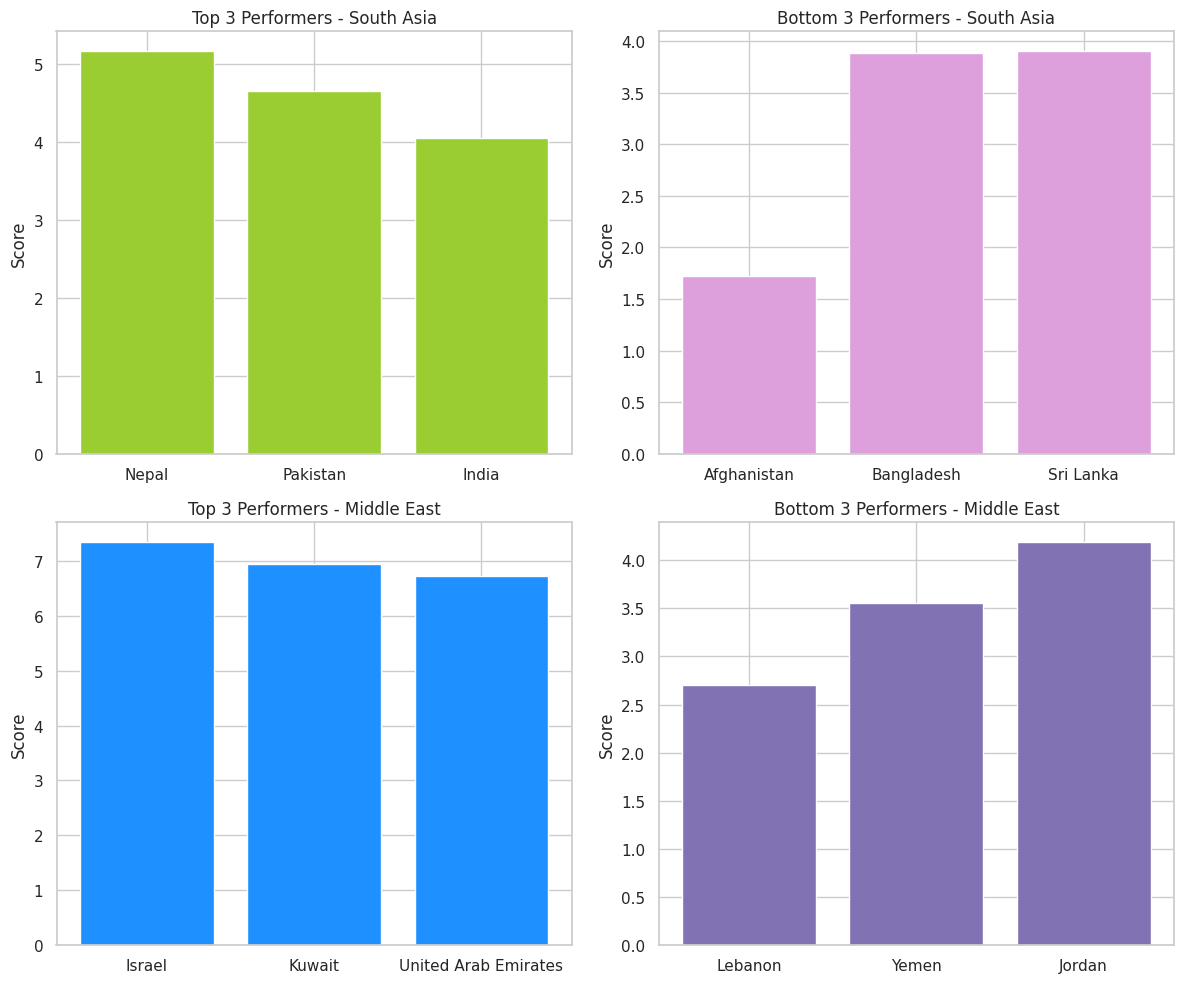

In [275]:
top_3_south_asia = dsa.nlargest(3, 'score')
bottom_3_south_asia = dsa.nsmallest(3, 'score')

top_3_middle_east = dme.nlargest(3, 'score')
bottom_3_middle_east = dme.nsmallest(3, 'score')

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].bar(top_3_south_asia['Country name'], top_3_south_asia['score'], color='yellowgreen')
axes[0, 0].set_title('Top 3 Performers - South Asia')
axes[0, 0].set_ylabel('Score')

axes[0, 1].bar(bottom_3_south_asia['Country name'], bottom_3_south_asia['score'], color='plum')
axes[0, 1].set_title('Bottom 3 Performers - South Asia')
axes[0, 1].set_ylabel('Score')

axes[1, 0].bar(top_3_middle_east['Country name'], top_3_middle_east['score'], color='dodgerblue')
axes[1, 0].set_title('Top 3 Performers - Middle East')
axes[1, 0].set_ylabel('Score')

axes[1, 1].bar(bottom_3_middle_east['Country name'], bottom_3_middle_east['score'], color='m')
axes[1, 1].set_title('Bottom 3 Performers - Middle East')
axes[1, 1].set_ylabel('Score')

plt.tight_layout()

plt.show()

3. Metric Comparisons:

  • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
  between the regions using grouped bar charts.

  • Which metrics show the largest disparity between the two regions?

<ipython-input-276-47ecf7f681a3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_metrics['Region'] = 'South Asia'
<ipython-input-276-47ecf7f681a3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_metrics['Region'] = 'Middle East'


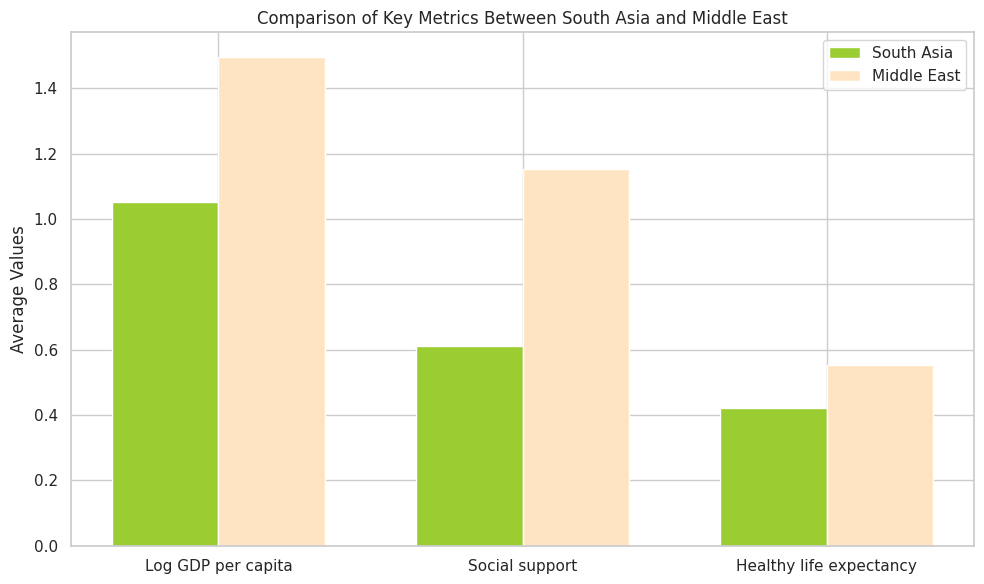

The metric with the largest disparity is: Social support
The largest disparity value is: 0.54
The region with the larger value for Social support is: Middle East


In [276]:
dsa = pd.read_csv("south_asia_filtered_data.csv")
dme = pd.read_csv("middle_eastern_countries.csv")

south_asia_metrics = dsa[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy']]

middle_east_metrics = dme[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy']]

south_asia_metrics['Region'] = 'South Asia'
middle_east_metrics['Region'] = 'Middle East'

combined_metrics = pd.concat([south_asia_metrics, middle_east_metrics], ignore_index=True)

avg_south_asia = south_asia_metrics[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()
avg_middle_east = middle_east_metrics[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()

metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_values = avg_south_asia.values
middle_east_values = avg_middle_east.values

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, south_asia_values, width, label='South Asia', color='yellowgreen')
rects2 = ax.bar(x + width/2, middle_east_values, width, label='Middle East', color='bisque')

ax.set_ylabel('Average Values')
ax.set_title('Comparison of Key Metrics Between South Asia and Middle East')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

disparity_gdp = abs(avg_south_asia['Log GDP per capita'] - avg_middle_east['Log GDP per capita'])
disparity_support = abs(avg_south_asia['Social support'] - avg_middle_east['Social support'])
disparity_health = abs(avg_south_asia['Healthy life expectancy'] - avg_middle_east['Healthy life expectancy'])

disparities = {
    'Log GDP per capita': disparity_gdp,
    'Social support': disparity_support,
    'Healthy life expectancy': disparity_health
}

largest_disparity_metric = max(disparities, key=disparities.get)
largest_disparity_value = disparities[largest_disparity_metric]

if avg_south_asia[largest_disparity_metric] > avg_middle_east[largest_disparity_metric]:
    largest_disparity_region = "South Asia"
else:
    largest_disparity_region = "Middle East"

print(f"The metric with the largest disparity is: {largest_disparity_metric}")
print(f"The largest disparity value is: {largest_disparity_value:.2f}")
print(f"The region with the larger value for {largest_disparity_metric} is: {largest_disparity_region}")

4. Happiness Disparity:

    • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

    • Which region has greater variability in happiness?

In [277]:
south_asia_scores = dsa['score']
south_asia_range = south_asia_scores.max() - south_asia_scores.min()

middle_east_scores = dme['score']
middle_east_range = middle_east_scores.max() - middle_east_scores.min()

print("Happiness Range Analysis:")
print("\nSouth Asia:")
print(f"Range (max - min): {south_asia_range:.2f}")

print("\nMiddle East:")
print(f"Range (max - min): {middle_east_range:.2f}")

if south_asia_range > middle_east_range:
    print("\nSouth Asia has a larger range in happiness scores.")
else:
    print("\nMiddle East has a larger range in happiness scores.")

Happiness Range Analysis:

South Asia:
Range (max - min): 3.44

Middle East:
Range (max - min): 4.63

Middle East has a larger range in happiness scores.


5. Correlation Analysis:

  • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
  Generosity within each region.
  
  • Create scatter plots to visualize and interpret the relationships.

Correlation Analysis:

South Asia:
Correlation between Score and Freedom to Make Life Choices: 0.80
Correlation between Score and Generosity: 0.87

Middle East:
Correlation between Score and Freedom to Make Life Choices: 0.86
Correlation between Score and Generosity: 0.63


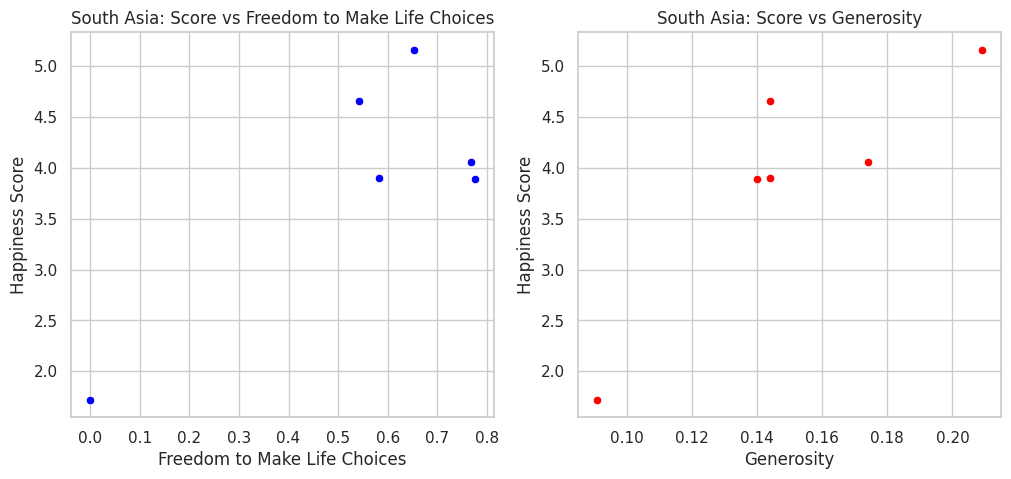

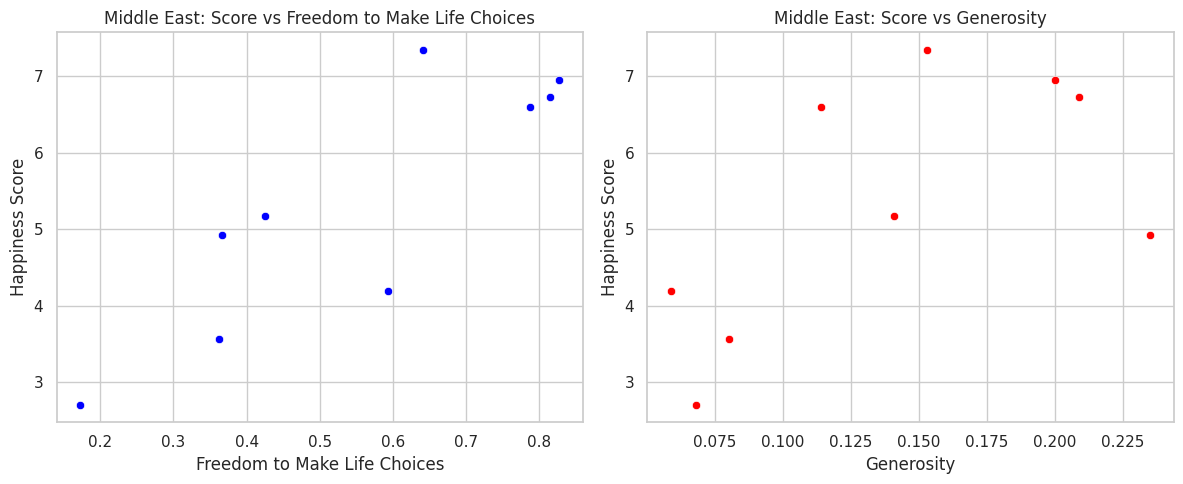

In [278]:
south_asia_corr_life_choices = dsa['score'].corr(dsa['Freedom to make life choices'])
south_asia_corr_generosity = dsa['score'].corr(dsa['Generosity'])

middle_east_corr_life_choices = dme['score'].corr(dme['Freedom to make life choices'])
middle_east_corr_generosity = dme['score'].corr(dme['Generosity'])

print("Correlation Analysis:")
print("\nSouth Asia:")
print(f"Correlation between Score and Freedom to Make Life Choices: {south_asia_corr_life_choices:.2f}")
print(f"Correlation between Score and Generosity: {south_asia_corr_generosity:.2f}")

print("\nMiddle East:")
print(f"Correlation between Score and Freedom to Make Life Choices: {middle_east_corr_life_choices:.2f}")
print(f"Correlation between Score and Generosity: {middle_east_corr_generosity:.2f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=dsa['Freedom to make life choices'], y=dsa['score'], color='blue')
plt.title('South Asia: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x=dsa['Generosity'], y=dsa['score'], color='red')
plt.title('South Asia: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=dme['Freedom to make life choices'], y=dme['score'], color='blue')
plt.title('Middle East: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x=dme['Generosity'], y=dme['score'], color='red')
plt.title('Middle East: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()

6. Outlier Detection:

  • Identify outlier countries in both regions based on Score and GDP per Capita.

  • Plot these outliers and discuss their implications.

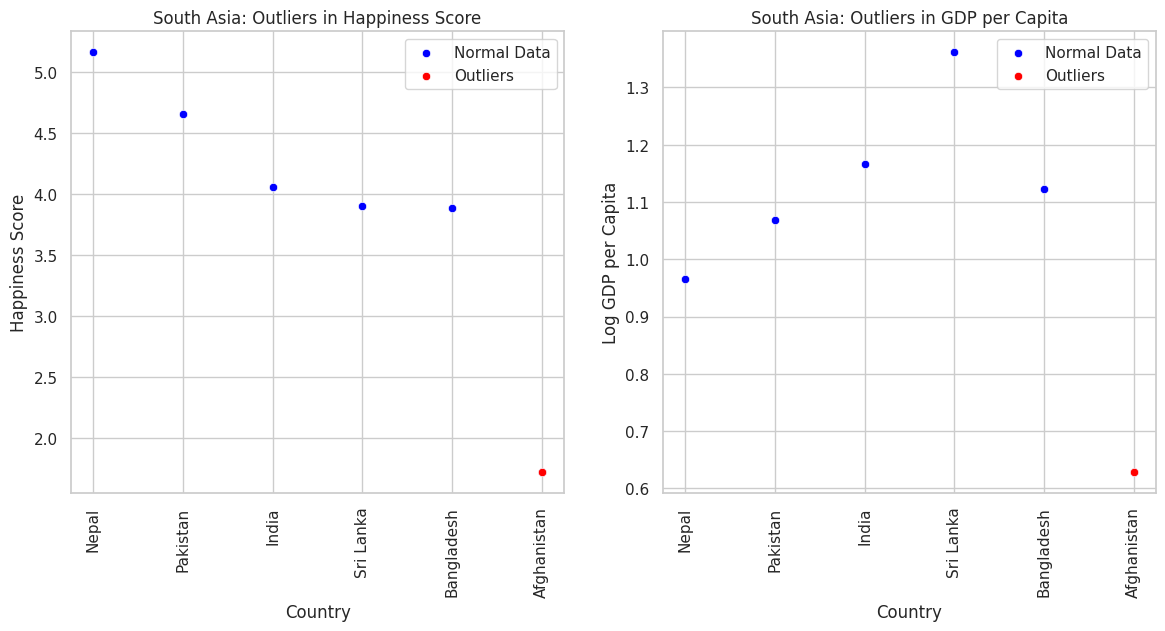

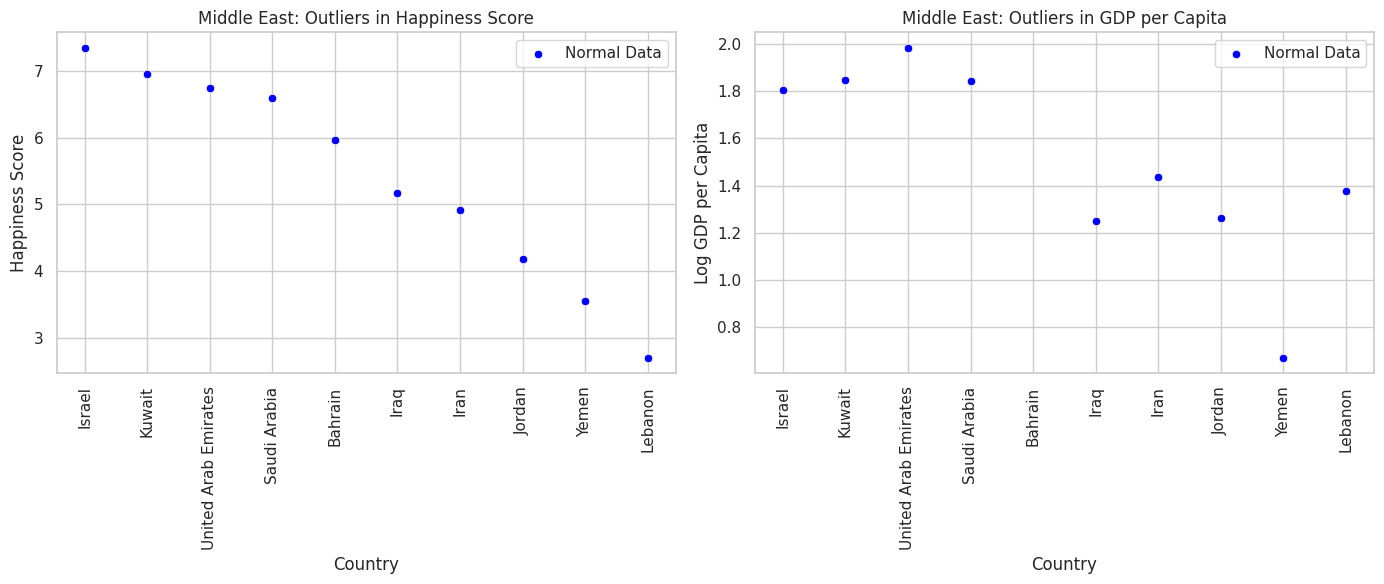


South Asia Outliers based on Happiness Score:
  Country name  score
5  Afghanistan  1.721

South Asia Outliers based on GDP per Capita:
  Country name  Log GDP per capita
5  Afghanistan               0.628

Middle East Outliers based on Happiness Score:
Empty DataFrame
Columns: [Country name, score]
Index: []

Middle East Outliers based on GDP per Capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


In [279]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


south_asia_outliers_score = detect_outliers(dsa, 'score')
south_asia_outliers_gdp = detect_outliers(dsa, 'Log GDP per capita')

middle_east_outliers_score = detect_outliers(dme, 'score')
middle_east_outliers_gdp = detect_outliers(dme, 'Log GDP per capita')

# South Asia: Outliers for Score and GDP per Capita
plt.figure(figsize=(14, 6))

# Plot for Happiness Score
plt.subplot(1, 2, 1)
sns.scatterplot(x=dsa['Country name'], y=dsa['score'], color='blue', label='Normal Data')
sns.scatterplot(x=south_asia_outliers_score['Country name'], y=south_asia_outliers_score['score'], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('South Asia: Outliers in Happiness Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

# Plot for GDP per Capita
plt.subplot(1, 2, 2)
sns.scatterplot(x=dsa['Country name'], y=dsa['Log GDP per capita'], color='blue', label='Normal Data')
sns.scatterplot(x=south_asia_outliers_gdp['Country name'], y=south_asia_outliers_gdp['Log GDP per capita'], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('South Asia: Outliers in GDP per Capita')
plt.xlabel('Country')
plt.ylabel('Log GDP per Capita')

# Middle East: Outliers for Score and GDP per Capita
plt.figure(figsize=(14, 6))

# Plot for Happiness Score
plt.subplot(1, 2, 1)
sns.scatterplot(x=dme['Country name'], y=dme['score'], color='blue', label='Normal Data')
sns.scatterplot(x=middle_east_outliers_score['Country name'], y=middle_east_outliers_score['score'], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Middle East: Outliers in Happiness Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

# Plot for GDP per Capita
plt.subplot(1, 2, 2)
sns.scatterplot(x=dme['Country name'], y=dme['Log GDP per capita'], color='blue', label='Normal Data')
sns.scatterplot(x=middle_east_outliers_gdp['Country name'], y=middle_east_outliers_gdp['Log GDP per capita'], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Middle East: Outliers in GDP per Capita')
plt.xlabel('Country')
plt.ylabel('Log GDP per Capita')

plt.tight_layout()
plt.show()

print("\nSouth Asia Outliers based on Happiness Score:")
print(south_asia_outliers_score[['Country name', 'score']])

print("\nSouth Asia Outliers based on GDP per Capita:")
print(south_asia_outliers_gdp[['Country name', 'Log GDP per capita']])

print("\nMiddle East Outliers based on Happiness Score:")
print(middle_east_outliers_score[['Country name', 'score']])

print("\nMiddle East Outliers based on GDP per Capita:")
print(middle_east_outliers_gdp[['Country name', 'Log GDP per capita']])

7. Visualization:

  • Create boxplots comparing the distribution of Score between South Asia and the Middle East.

  • Interpret the key differences in distribution shapes, medians, and outliers.

<ipython-input-280-47292a6a53fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='score', data=combined_df,


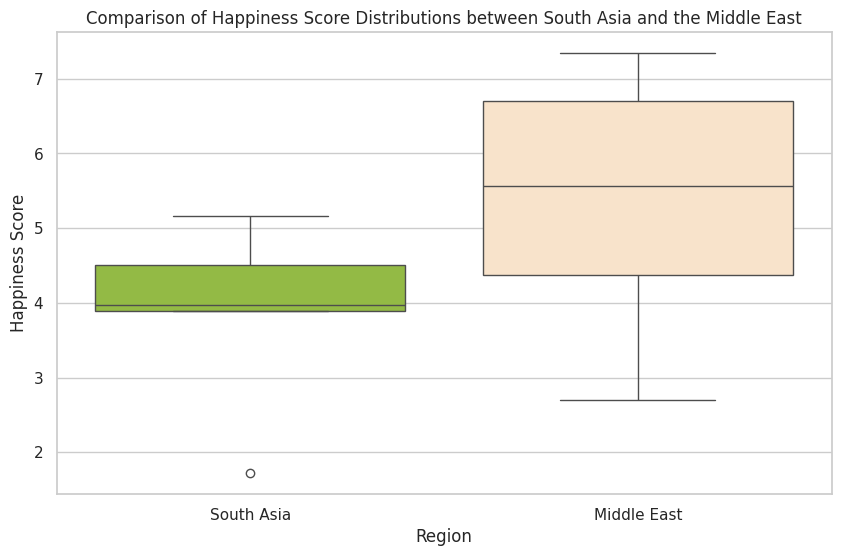

In [280]:
# Assign regions to the datasets
dsa['Region'] = 'South Asia'
dme['Region'] = 'Middle East'

combined_df = pd.concat([
    dsa[['Country name', 'score', 'Region']],
    dme[['Country name', 'score', 'Region']].rename(columns={'Score': 'score'})
], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df,
            palette={'South Asia': 'yellowgreen', 'Middle East': 'bisque'})

plt.title('Comparison of Happiness Score Distributions between South Asia and the Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')

plt.show()